In [0]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# importing file
url="https://drive.google.com/uc?export=download&id=1vW1eVZDfW-heTNtx_Gjv6LXCspIc3xdZ"
data = pd.read_csv(url, header = 0)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df = pd.DataFrame({'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
                  'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]})

In [0]:
np.random.seed(200)

In [0]:
k=3
#centroid
centroids ={
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)}

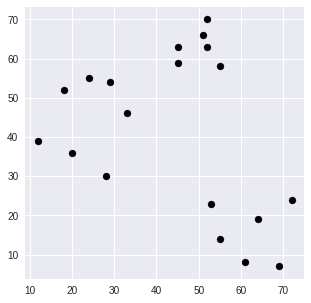

In [0]:
fig = plt.figure(figsize=(5,5))

plt.scatter(df['x'],df['y'],color='k')
colmap = {1:'r', 2:'g', 3:'b'}

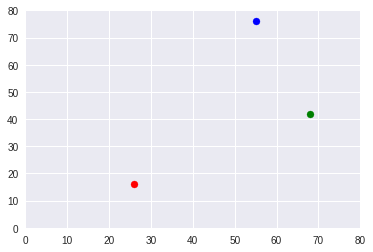

In [0]:
for i in centroids.keys():
  plt.scatter(*centroids[i], color =colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        19.104973        63.063460        45.880279        1     r
1  20  36        11.661904        57.688820        39.824616        1     r
2  28  30         4.472136        55.172457        36.796739        1     r
3  18  52        27.202941        52.497619        37.121422        1     r
4  29  54        28.160256        41.436699        26.019224        3     b


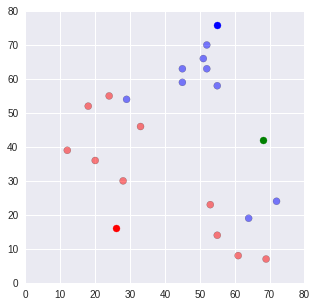

In [0]:
def assignment(df, centroids):
  for i in centroids.keys():
    #euclideian distance = pythogorus theorem
    df['distance_from_{}'.format(i)] = (
    np.sqrt(
        (df['x'] - centroids[i][0])**2
        +(df['y'] - centroids[i][0])**2))
   
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color']= df['closest'].map(lambda x: colmap[x])
  return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor ='k')

for i in centroids.keys():
  plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()
   

In [0]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

In [0]:
#update

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroid.keys():
    centroids[i][0]= np.mean(df[df['closest'] == i]['x'])
    centroids[i][1]= np.mean(df[df['closest'] == i]['y'])
  print(k)
  return k


centroids = update(centroids)

fig = plt.figure(figsize = (5,5))
ax = plt.axes()

plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor ='k')
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx =  (centroids[i][0] - old_centroids[i][0])*0.75
  dy =  (centroids[i][1] - old_centroids[i][1])*0.75 
plt.show()
  
  


NameError: ignored

In [0]:
while True:
  closest_centroids = df['closest'].copy(deep=True)
  centroids = update(centroids)
  
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break
    
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor ='k')

for i in centroids.keys():
  plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()
   

NameError: ignored